In [17]:
import warnings
warnings.filterwarnings('ignore')

In [54]:
import pandas as pd
import numpy as np

# Define the questions and their weights
questions = [
    "Are you exhausted in the morning at the thought of another day at work?",
    "How often do you feel worn out?",
    "Do you feel that every working hour is tiring for you?",
    "How often do you think: 'I can’t take it anymore'?",
    "How often are you emotionally exhausted?",
    "Does your work frustrate you?",
    "How often do you feel tired?",
    "Do you feel worn out at the end of the working day?",
    "Do you have enough energy for family and friends during your leisure time?",
    "How often are you physically exhausted?",
    "How often do you feel weak and susceptible to illness?",
    "Is your work emotionally exhausting?",
    "Do you feel burnt out because of your work?"
]

weights = [3, 2, 3, 4, 5, 2, 3, 4, 2, 4, 3, 5, 5]

# Generate random responses for each participant
np.random.seed(42)  # For reproducibility
responses = np.random.randint(1, 6, size=(10000, len(questions)))

# Calculate total score for each participant
# Total Score = (Q1 * Weight1) + (Q2 * Weight2) + ... + (Qn * Weightn)
total_scores = np.dot(responses, weights)

# Calculate percentage likely to burnout
max_score = sum([5 * w for w in weights])
percentages = (total_scores / max_score) * 100

# Create a DataFrame
data = pd.DataFrame(responses, columns=questions)
data['Total Score'] = total_scores
data['Percentage Likely to Burnout'] = percentages

# Export to CSV
data.to_csv('copenhagen_burnout_inventory_dataset.csv', index=False)


In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Load the dataset
data = pd.read_csv('copenhagen_burnout_inventory_dataset.csv')

# Define features (X) and target variable (y)
X = data.drop(['Total Score', 'Percentage Likely to Burnout'], axis=1)
y = data['Percentage Likely to Burnout']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

# Save the model
joblib.dump(rf_regressor, 'rf_burnout_model.joblib')


Mean Squared Error: 8.247358666666674
R-squared Score: 0.878412894364804


['rf_burnout_model.joblib']

In [60]:
print(X_test.iloc[0])



Are you exhausted in the morning at the thought of another day at work?       4
How often do you feel worn out?                                               3
Do you feel that every working hour is tiring for you?                        2
How often do you think: 'I can’t take it anymore'?                            4
How often are you emotionally exhausted?                                      2
Does your work frustrate you?                                                 1
How often do you feel tired?                                                  2
Do you feel worn out at the end of the working day?                           1
Do you have enough energy for family and friends during your leisure time?    1
How often are you physically exhausted?                                       5
How often do you feel weak and susceptible to illness?                        3
Is your work emotionally exhausting?                                          2
Do you feel burnt out because of your wo

In [72]:
# Load the trained model
loaded_model = joblib.load('rf_burnout_model.joblib')

# Example input row for prediction

idx = 997

input_row = X_test.iloc[idx]

# Predict burnout percentage
predicted_burnout_percentage = loaded_model.predict([input_row])
print("Predicted Burnout Percentage:", predicted_burnout_percentage)


actual_percentage = data.loc[idx, 'Percentage Likely to Burnout']
print("Actual Burnout Percentage:", actual_percentage)


Predicted Burnout Percentage: [51.71555556]
Actual Burnout Percentage: 50.22222222222222


Predicted Burnout Percentage: [55.60444444]


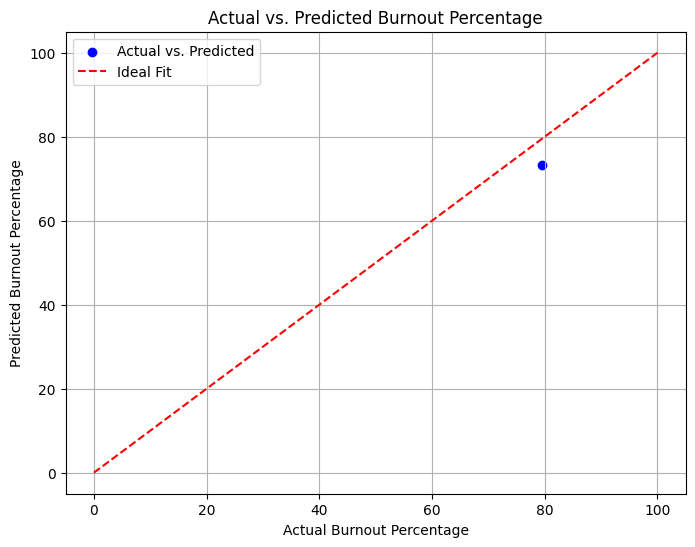

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('copenhagen_burnout_inventory_dataset.csv')

# Select a specific input row (for example, the first row)
input_row = X.iloc[0].values.reshape(1, -1)

# Predict the burnout percentage for the input row
predicted_percentage = loaded_model.predict(input_row)

# Get the actual burnout percentage for the input row
actual_percentage = data.loc[0, 'Percentage Likely to Burnout']

# Plot actual vs. predicted burnout percentage
plt.figure(figsize=(8, 6))
plt.scatter(actual_percentage, predicted_percentage, color='blue', label='Actual vs. Predicted')
plt.plot([0, 100], [0, 100], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Burnout Percentage')
plt.ylabel('Predicted Burnout Percentage')
plt.title('Actual vs. Predicted Burnout Percentage')
plt.legend()
plt.grid(True)
plt.show()


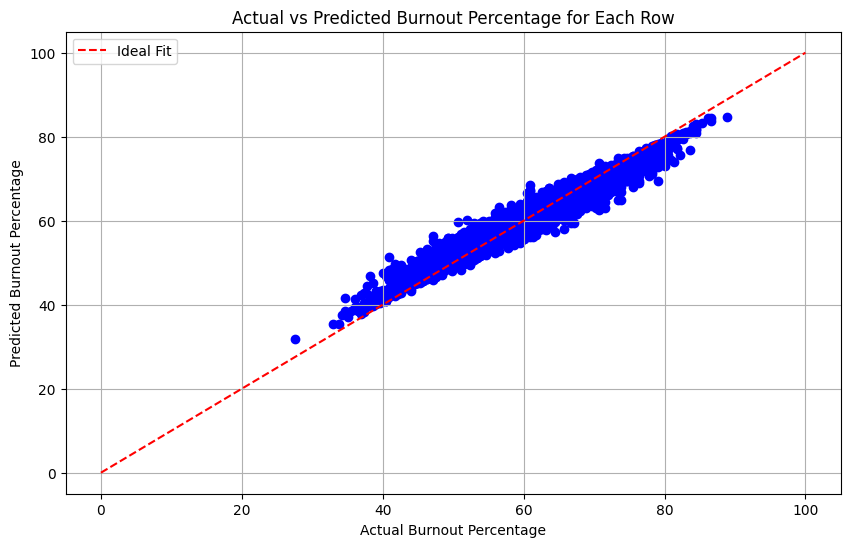

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('copenhagen_burnout_inventory_dataset.csv')

# Extract features (X) and target variable (y)
X = data.drop(['Total Score', 'Percentage Likely to Burnout'], axis=1)
y = data['Percentage Likely to Burnout']

# Plot actual vs predicted burnout percentage for each row
plt.figure(figsize=(10, 6))
for i in range(len(data)):
    input_row = X.iloc[i].values.reshape(1, -1)
    actual_percentage = y.iloc[i]
    predicted_percentage = loaded_model.predict(input_row)
    plt.scatter(actual_percentage, predicted_percentage, color='blue')

plt.plot([0, 100], [0, 100], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Burnout Percentage')
plt.ylabel('Predicted Burnout Percentage')
plt.title('Actual vs Predicted Burnout Percentage for Each Row')
plt.legend()
plt.grid(True)
plt.show()


In [52]:

mdl = joblib.load('burnout_model.joblib')

input_row_x = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
print(input_row_x)
predicted_percentage_x = mdl.predict(input_row_x)
print(predicted_percentage_x)



input_row_y = [[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]]
print(input_row_y)
predicted_percentage_y = mdl.predict(input_row_y)
print(predicted_percentage_y)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
[39.36888889]
[[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]]
[80.07111111]
